In [1]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
sns.set(style="darkgrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
s=os.getcwd()

In [5]:
items = pd.read_csv(s+'/all/items.csv')
shops = pd.read_csv(s+'/all/shops.csv')
cats = pd.read_csv(s+'/all/item_categories.csv')
sales = pd.read_csv(s+'/all/sales_train.csv')
# set index to ID to avoid dropping it later
test = pd.read_csv(s+'/all/test.csv').set_index('ID')

In [12]:
train = sales.join(items, on='item_id', rsuffix='_').join(shops, on='shop_id', rsuffix='_').join(cats, on='item_category_id', rsuffix='_').drop(['item_id_', 'shop_id_', 'item_category_id_'], axis=1)

In [24]:
train.shape

         date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154      999.00          1.00   
1  03.01.2013               0       25     2552      899.00          1.00   
2  05.01.2013               0       25     2552      899.00         -1.00   
3  06.01.2013               0       25     2554     1709.05          1.00   
4  15.01.2013               0       25     2555     1099.00          1.00   

                                  item_name  item_category_id  \
0                         ЯВЛЕНИЕ 2012 (BD)                37   
1  DEEP PURPLE  The House Of Blue Light  LP                58   
2  DEEP PURPLE  The House Of Blue Light  LP                58   
3  DEEP PURPLE  Who Do You Think We Are  LP                58   
4   DEEP PURPLE 30 Very Best Of 2CD (Фирм.)                56   

                shop_name                   item_category_name  
0  Ярославль ТЦ "Альтаир"                       Кино - Blu-Ray  
1     Москва ТРК

In [28]:
print(train.describe())

       date_block_num    shop_id    item_id  item_price  item_cnt_day  \
count      2935849.00 2935849.00 2935849.00  2935849.00    2935849.00   
mean            14.57      33.00   10197.23      890.85          1.24   
std              9.42      16.23    6324.30     1729.80          2.62   
min              0.00       0.00       0.00       -1.00        -22.00   
25%              7.00      22.00    4476.00      249.00          1.00   
50%             14.00      31.00    9343.00      399.00          1.00   
75%             23.00      47.00   15684.00      999.00          1.00   
max             33.00      59.00   22169.00   307980.00       2169.00   

       item_category_id  
count        2935849.00  
mean              40.00  
std               17.10  
min                0.00  
25%               28.00  
50%               40.00  
75%               55.00  
max               83.00  


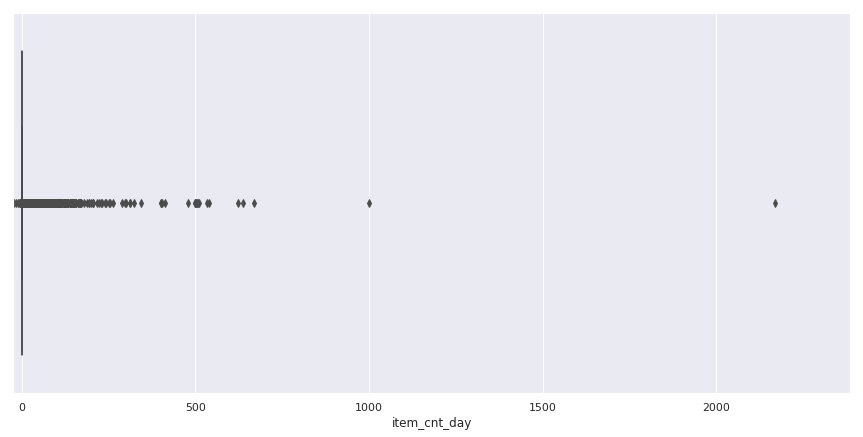

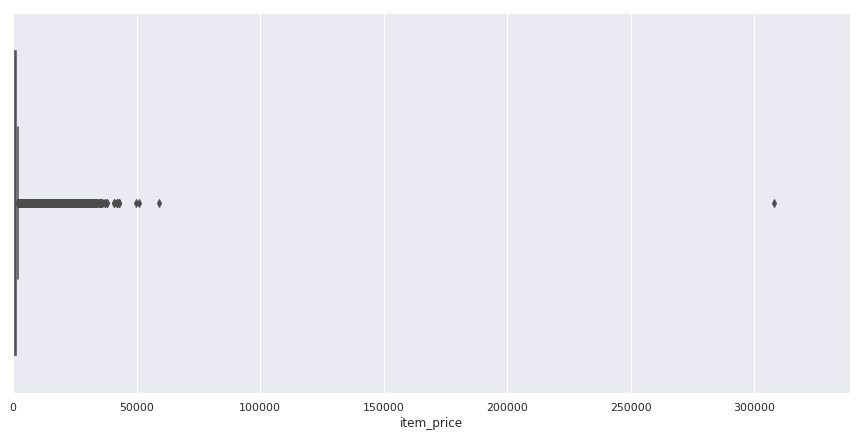

In [29]:
plt.figure(figsize=(15,7))
plt.xlim(train.item_cnt_day.min()*1.1, train.item_cnt_day.max()*1.1)
sns.boxplot(x=train.item_cnt_day)

plt.figure(figsize=(15,7))
plt.xlim(train.item_price.min(), train.item_price.max()*1.1)
sns.boxplot(x=train.item_price)

In [36]:
median = train.item_price.median()
train.loc[train.item_price<0, 'item_price'] = median
train = train[train.item_price<100000]

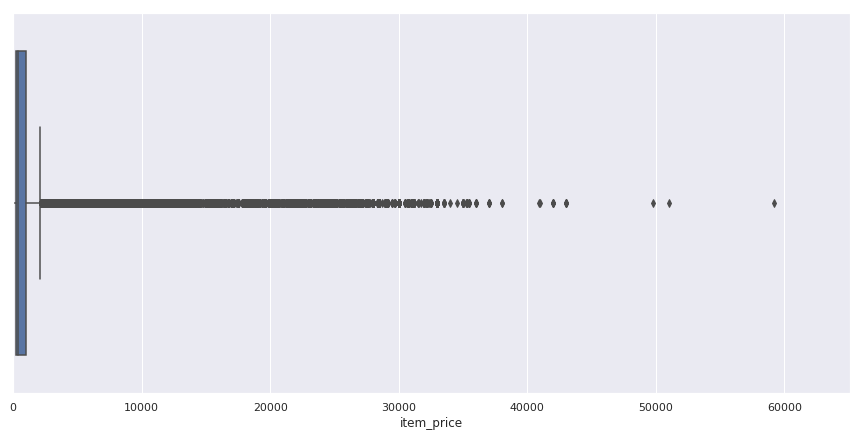

In [37]:
plt.figure(figsize=(15,7))
plt.xlim(train.item_price.min(), train.item_price.max()*1.1)
sns.boxplot(x=train.item_price)

In [ ]:
train = train[train.item_cnt_day<1500]

In [40]:
test_shop_ids = test['shop_id'].unique()
test_item_ids = test['item_id'].unique()
lk_train = train[train['shop_id'].isin(test_shop_ids)]
lk_train = lk_train[lk_train['item_id'].isin(test_item_ids)]

In [ ]:
train_monthly = lk_train[['date', 'date_block_num', 'shop_id', 'item_category_id', 'item_id', 'item_price', 'item_cnt_day']]